# SMS Spam Collection Dataset
- Class 1 = Spam, Class 0 = Not spam (i.e., ham)

## Load the dataset

In [1]:
def get_data():
    f = open('data/SMSSpamCollection.txt', 'r')
    texts, labels = [], []
    for line in f:
        line = line.strip()
        tab_idx = line.index('\t')
        label = line[:tab_idx]
        text = line[tab_idx+1:]
        if label == 'ham':
            label = 0
        elif label == 'spam':
            label = 1
        else:
            raise Exception(f"Invalid label - {label}")
        texts.append(text)
        labels.append(label)
    return texts, labels

- Partition the dataset into training, validation, and test splits
- Construct $\mathcal{D}^+$ and $\mathcal{D}^-$ from the training split

In [2]:
from sklearn.model_selection import train_test_split
texts, labels = get_data()
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

positive = [t for idx, t in enumerate(X_train) if y_train[idx]]
negative = [t for idx, t in enumerate(X_train) if not y_train[idx]]
print(f'Positive examples = {len(positive)}\nNegative examples = {len(negative)}')

Positive examples = 488
Negative examples = 3079


## Learn GrASP patterns

In [3]:
import sys
import grasptext as grasp

In [4]:
# Create the GrASP engine
grasp_model = grasp.GrASP(include_standard = ['LEMMA', 'POS', 'HYPERNYM', 'SENTIMENT'],
                    num_patterns = 100, alphabet_size = 200, gaps_allowed = 2)

# Fit GrASP engine to the dataset
the_patterns = grasp_model.fit_transform(positive, negative)

  0%|          | 0/488 [00:00<?, ?it/s]

Step 1: Create augmented texts


100%|██████████| 3079/3079 [01:33<00:00, 33.01it/s]


Step 2: Find frequent attributes


  1%|          | 7/1176 [00:00<00:17, 68.12it/s]

Total number of candidate alphabet = 1176, such as ['SPACY:POS-VERB', 'SPACY:POS-NOUN', 'SPACY:POS-PUNCT', 'LEMMA:-pron-', 'SPACY:POS-PRON']
Step 3: Find alphabet set


100%|██████████| 1176/1176 [00:27<00:00, 43.47it/s]


Finding top k: 20 / 200
Finding top k: 40 / 200
Finding top k: 60 / 200
Finding top k: 80 / 200
Finding top k: 100 / 200
Finding top k: 120 / 200
Finding top k: 140 / 200
Finding top k: 160 / 200
Finding top k: 180 / 200
Finding top k: 200 / 200


  0%|          | 0/200 [00:00<?, ?it/s]

Total number of alphabet = 200
['SPACY:POS-NUM', 'SPACY:POS-PROPN', 'LEMMA:call', 'LEMMA:txt', 'SPACY:POS-SYM', 'LEMMA:free', 'LEMMA:claim', 'LEMMA:mobile', 'LEMMA:!', 'LEMMA:win', 'HYPERNYM:cost.n.01', 'SPACY:POS-ADP', 'HYPERNYM:message.n.02', 'LEMMA:prize', 'LEMMA:to', 'HYPERNYM:communication.n.02', 'SENTIMENT:pos', 'LEMMA:text', 'HYPERNYM:symbol.n.01', 'HYPERNYM:statement.n.01', 'SPACY:POS-ADJ', 'LEMMA:or', 'LEMMA:-', 'LEMMA:150p', 'LEMMA:award', 'LEMMA:urgent', 'HYPERNYM:book.n.01', 'HYPERNYM:act.n.02', 'LEMMA:stop', 'HYPERNYM:contest.v.01', 'LEMMA:+', 'HYPERNYM:written_communication.n.01', 'SPACY:POS-PRON', 'LEMMA:16', 'LEMMA:reply', 'LEMMA:service', 'LEMMA:tone', 'LEMMA:cash', 'HYPERNYM:abstraction.n.06', 'LEMMA:from', 'HYPERNYM:assertion.n.01', 'LEMMA:now', 'HYPERNYM:award.n.02', 'LEMMA:.', 'LEMMA:nokia', 'LEMMA:18', 'HYPERNYM:acquisition.n.02', 'SPACY:POS-DET', 'LEMMA:a', 'HYPERNYM:user.n.01', 'LEMMA:contact', 'HYPERNYM:mobile.n.02', 'LEMMA:i', 'HYPERNYM:minute.n.01', 'HYPERNYM

100%|██████████| 200/200 [03:32<00:00,  1.06s/it]


Length 2 / 5; New candidates = 59900
Finding top k: 10 / 100
Finding top k: 20 / 100
Finding top k: 30 / 100
Finding top k: 40 / 100
Finding top k: 50 / 100
Finding top k: 60 / 100
Finding top k: 70 / 100
Finding top k: 80 / 100
Finding top k: 90 / 100
Finding top k: 100 / 100
Example of current patterns
Pattern: [['SPACY:POS-NUM']]
Window size: 3
Class: Negative
Precision: 0.526
Match: 936 (26.2%)
Gain = 0.223
Metric (global) = 0.223
Examples ~ Class Negative:
[MATCH]: Daddy , shu shu is looking 4:['SPACY:POS-NUM'] u ... U wan me 2 tell him u're not in singapore or wat ? 
-------------------------
[MATCH]: I wnt to buy a BMW car urgently .. its vry urgent.but:['SPACY:POS-NUM'] hv a shortage of   & lt;#&gt ; Lacs.there is no source to arng dis amt . & lt;#&gt ; lacs .. thats my prob 
-------------------------
Counterexamples ~ Not class Negative:
[MATCH]: Dear Matthew please call 09063440451:['SPACY:POS-NUM'] from a landline , your complimentary 4*Lux Tenerife holiday or Â£1000 CASH aw

100%|██████████| 74/74 [03:05<00:00,  2.50s/it]


Length 3 / 5; New candidates = 29293
Finding top k: 10 / 100
Finding top k: 20 / 100
Finding top k: 30 / 100
Finding top k: 40 / 100
Finding top k: 50 / 100
Finding top k: 60 / 100
Finding top k: 70 / 100
Finding top k: 80 / 100
Finding top k: 90 / 100
Finding top k: 100 / 100
Example of current patterns
Pattern: [['SPACY:POS-NUM']]
Window size: 3
Class: Negative
Precision: 0.526
Match: 936 (26.2%)
Gain = 0.223
Metric (global) = 0.223
Examples ~ Class Negative:
[MATCH]: WE REGRET TO INFORM U THAT THE NHS HAS MADE A MISTAKE.U WERE NEVER ACTUALLY BORN.PLEASE REPORT 2:['SPACY:POS-NUM'] YOR LOCAL HOSPITAL 2B TERMINATED.WE R SORRY 4 THE INCONVENIENCE 
-------------------------
[MATCH]: Yup i thk cine is better cos no need 2:['SPACY:POS-NUM'] go down 2 plaza mah . 
-------------------------
Counterexamples ~ Not class Negative:
[MATCH]: URGENT , IMPORTANT INFORMATION FOR O2 USER . TODAY IS YOUR LUCKY DAY ! 2:['SPACY:POS-NUM'] FIND OUT WHY LOG ONTO HTTP://WWW.URAWINNER.COM THERE IS A FANTASTI

100%|██████████| 41/41 [01:24<00:00,  2.06s/it]


Length 4 / 5; New candidates = 16327
Finding top k: 10 / 100
Finding top k: 20 / 100
Finding top k: 30 / 100
Finding top k: 40 / 100
Finding top k: 50 / 100
Finding top k: 60 / 100
Finding top k: 70 / 100
Finding top k: 80 / 100
Finding top k: 90 / 100
Finding top k: 100 / 100
Example of current patterns
Pattern: [['SPACY:POS-NUM']]
Window size: 3
Class: Negative
Precision: 0.526
Match: 936 (26.2%)
Gain = 0.223
Metric (global) = 0.223
Examples ~ Class Negative:
[MATCH]: I might come to kerala for 2:['SPACY:POS-NUM'] days.so you can be prepared to take a leave once i finalise .dont plan any travel during my visit.need to finish urgent works . 
-------------------------
[MATCH]: 8:['SPACY:POS-NUM'] at the latest , g 's still there if you can scrounge up some ammo and want to give the new ak a try 
-------------------------
Counterexamples ~ Not class Negative:
[MATCH]: Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over ? Pls leave msg 2day:['SPACY:POS-N

100%|██████████| 2/2 [00:04<00:00,  2.29s/it]


Length 5 / 5; New candidates = 798
Finding top k: 10 / 100
Finding top k: 20 / 100
Finding top k: 30 / 100
Finding top k: 40 / 100
Finding top k: 50 / 100
Finding top k: 60 / 100
Finding top k: 70 / 100
Finding top k: 80 / 100
Finding top k: 90 / 100
Finding top k: 100 / 100
Example of current patterns
Pattern: [['SPACY:POS-NUM']]
Window size: 3
Class: Negative
Precision: 0.526
Match: 936 (26.2%)
Gain = 0.223
Metric (global) = 0.223
Examples ~ Class Negative:
[MATCH]: Or just do that 6times:['SPACY:POS-NUM'] 
-------------------------
[MATCH]: Jolly good ! By the way ,   will give u tickets for sat eve 7.30:['SPACY:POS-NUM'] . Speak before then x 
-------------------------
Counterexamples ~ Not class Negative:
[MATCH]: T - Mobile customer you may now claim your FREE CAMERA PHONE upgrade & a pay & go sim card for your loyalty . Call on 0845:['SPACY:POS-NUM'] 021 3680.Offer ends 28thFeb . T&C 's apply 
-------------------------
[MATCH]: URGENT ! We are trying to contact U. Todays draw sh

In [5]:
# Print the list of patterns
for idx, p in enumerate(the_patterns):
    print(idx, p.get_pattern_id())

0 [['SPACY:POS-NUM']]
1 [['SPACY:POS-PROPN'], ['SPACY:POS-NUM']]
2 [['SPACY:POS-PUNCT'], ['SPACY:POS-NUM']]
3 [['SPACY:POS-PROPN'], ['SPACY:POS-PROPN']]
4 [['LEMMA:call'], ['SPACY:POS-NUM']]
5 [['SPACY:POS-ADP'], ['SPACY:POS-NUM']]
6 [['SPACY:POS-NUM'], ['SPACY:POS-PROPN']]
7 [['SPACY:POS-NOUN'], ['SPACY:POS-PROPN']]
8 [['LEMMA:to'], ['SPACY:POS-NUM']]
9 [['SPACY:POS-PROPN']]
10 [['SPACY:POS-NUM'], ['SPACY:POS-PUNCT']]
11 [['SPACY:POS-NOUN'], ['SPACY:POS-NOUN'], ['SPACY:POS-NUM']]
12 [['SPACY:POS-PROPN'], ['SPACY:POS-PROPN'], ['SPACY:POS-PROPN']]
13 [['LEMMA:.'], ['SPACY:POS-NUM']]
14 [['SPACY:POS-NUM'], ['SPACY:POS-NUM']]
15 [['LEMMA:call']]
16 [['SPACY:POS-PUNCT'], ['SPACY:POS-PROPN']]
17 [['SPACY:POS-PROPN'], ['SPACY:POS-NOUN']]
18 [['SPACY:POS-NUM'], ['SPACY:POS-ADP']]
19 [['SPACY:POS-ADJ'], ['SPACY:POS-NUM']]
20 [['SPACY:POS-PUNCT'], ['SPACY:POS-PROPN'], ['SPACY:POS-PROPN']]
21 [['SPACY:POS-PROPN'], ['SPACY:POS-PUNCT']]
22 [['SPACY:POS-PROPN'], ['SPACY:POS-PROPN'], ['SPACY:POS-NOU

In [67]:
# Save patterns
grasp_model.to_json('results/1_spam/GrASP_patterns.json')

100%|██████████| 100/100 [00:00<00:00, 245.75it/s]


Successfully dump the results to results/1_spam/GrASP_patterns.json


## TQBAFc
- In this implementation, the PLR model is trained under the explanation engine (i.e., the `ArgTextClas` object).
- When making a prediction, the result will be inferred from the strength of $\delta$ of the QBAFc (which is equivalent to applying the PLR model directly to the feature vector).

In [6]:
from axplr import *

In [15]:
# Train a PLR model and setup the TQBAFc structure
tqbafc_plr_model = ArgTextClas.from_grasp(grasp_model,
                       the_patterns,
                       semantics = 'logistic',
                       reverse = False,  # If reverse was True, this would generate BQBAFc instead.
                       X_train = X_train, 
                       y_train = y_train)

100%|██████████| 3567/3567 [01:47<00:00, 33.23it/s]


- Evaluate the model performance on the test set. For each test example, we perform the following step in the `predict_proba` function:
    - TQBAFc construction
    - Strength calculation

In [16]:
from sklearn.metrics import classification_report
y_pred_proba = tqbafc_plr_model.predict_proba(X_test)
y_pred = y_pred_proba.argmax(axis=1).squeeze()
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos'], digits = 3))

100%|██████████| 1115/1115 [00:33<00:00, 33.04it/s]


Eidx: 0
Compute order: [19, 74, 86, 88, 6, 11, 1, 72, 0]
Attacked: {0: {72, 1}, 1: {11}, 6: {74}, 11: set(), 19: set(), 72: set(), 74: set(), 86: set(), 88: set()}
Supported: {0: {88, 86}, 1: {19, 6}, 6: set(), 11: {74}, 19: set(), 72: {19, 6}, 74: set(), 86: set(), 88: set()}
Final strengths: {0: 4.846117652943484, 1: 1.0095722036940962, 6: 0.30023483719295374, 11: 0.43064947751019644, 19: 0.21491676504384122, 72: 0.6501603657870372, 74: 0.04890636257172274, 86: 0.5368741995176334, 88: 0.16908640309147593}
--------------------------------------------------
Eidx: 1
Compute order: [75, 86, 0]
Attacked: {0: {75}, 75: set(), 86: set()}
Supported: {0: {86}, 75: set(), 86: set()}
Final strengths: {0: 6.051134898270439, 75: 0.2856289210627021, 86: 0.5368741995176334}
--------------------------------------------------
Eidx: 2
Compute order: [27, 44, 45, 47, 62, 96, 1, 8, 17, 22, 72, 75, 88, 10, 0]
Attacked: {0: {72, 1, 10, 75}, 1: {27}, 8: {47}, 10: {8, 17, 22}, 17: {44}, 22: {45}, 27: set(),

Supported: {0: {86}, 10: {18}, 18: set(), 22: set(), 49: set(), 86: set()}
Final strengths: {0: 5.352617037751442, 10: 0.79878535996904, 18: 0.18930163936975522, 22: 0.31405518054467785, 49: 0.37072284322531784, 86: 0.3515127779049745}
--------------------------------------------------
Eidx: 320
Compute order: [32, 72, 96, 8, 22, 10, 0]
Attacked: {0: {72, 10}, 8: set(), 10: {8, 32, 22}, 22: set(), 32: set(), 72: set(), 96: set()}
Supported: {0: set(), 8: {96}, 10: set(), 22: {96}, 32: set(), 72: set(), 96: set()}
Final strengths: {0: 5.642799947480607, 8: 0.11634543957095067, 10: -0.2354948923337391, 22: 0.547932297434675, 32: 0.4947560564720762, 72: 0.3925845646686396, 96: 0.09703139055467631}
--------------------------------------------------
Eidx: 321
Compute order: [0]
Attacked: {0: set()}
Supported: {0: set()}
Final strengths: {0: 5.799889619815508}
--------------------------------------------------
Eidx: 322
Compute order: [14, 18, 27, 32, 36, 44, 45, 51, 75, 98, 99, 3, 17, 22, 7

Supported: {0: set()}
Final strengths: {0: 5.799889619815508}
--------------------------------------------------
Eidx: 492
Compute order: [99, 72, 0]
Attacked: {0: {72}, 72: set(), 99: set()}
Supported: {0: set(), 72: {99}, 99: set()}
Final strengths: {0: 5.091404793616259, 72: 0.7084848261992489, 99: 0.3159002615306093}
--------------------------------------------------
Eidx: 493
Compute order: [14, 15, 19, 20, 21, 23, 24, 26, 33, 35, 37, 45, 46, 47, 48, 51, 55, 64, 69, 71, 73, 87, 89, 95, 2, 3, 6, 7, 8, 11, 13, 17, 18, 22, 25, 75, 1, 4, 72, 10, 0]
Attacked: {0: {1, 33, 71, 72, 10, 75}, 1: {11, 7}, 2: {64, 95}, 3: {26, 87}, 4: {48, 46}, 6: set(), 7: set(), 8: {47}, 10: {69, 7, 8, 17, 22, 55, 25}, 11: set(), 13: set(), 14: set(), 15: set(), 17: {21, 37}, 18: set(), 19: set(), 20: set(), 21: set(), 22: {45}, 23: set(), 24: set(), 25: {24}, 26: set(), 33: set(), 35: set(), 37: set(), 45: set(), 46: set(), 47: set(), 48: set(), 51: set(), 55: set(), 64: set(), 69: set(), 71: set(), 72: {2

Supported: {0: set()}
Final strengths: {0: 5.799889619815508}
--------------------------------------------------
Eidx: 670
Compute order: [75, 99, 72, 0]
Attacked: {0: {72, 75}, 72: set(), 75: set(), 99: set()}
Supported: {0: set(), 72: {99}, 75: set(), 99: set()}
Final strengths: {0: 4.805775872553557, 72: 0.7084848261992489, 75: 0.2856289210627021, 99: 0.3159002615306093}
--------------------------------------------------
Eidx: 671
Compute order: [21, 23, 25, 34, 46, 49, 51, 55, 60, 89, 96, 99, 4, 8, 17, 18, 22, 72, 75, 86, 10, 0]
Attacked: {0: {72, 10, 34, 75}, 4: {46}, 8: set(), 10: {8, 17, 22, 55, 25}, 17: {21}, 18: set(), 21: set(), 22: {49}, 23: set(), 25: set(), 34: set(), 46: set(), 49: set(), 51: set(), 55: set(), 60: set(), 72: {25}, 75: set(), 86: {49}, 89: set(), 96: set(), 99: set()}
Supported: {0: {86}, 4: {21, 23}, 8: {96, 46}, 10: {18, 51, 4}, 17: {60}, 18: {89, 23}, 21: set(), 22: {96, 60}, 23: set(), 25: set(), 34: set(), 46: set(), 49: set(), 51: set(), 55: set(), 6

Supported: {0: set()}
Final strengths: {0: 5.799889619815508}
--------------------------------------------------
Eidx: 920
Compute order: [0]
Attacked: {0: set()}
Supported: {0: set()}
Final strengths: {0: 5.799889619815508}
--------------------------------------------------
Eidx: 921
Compute order: [75, 86, 88, 0]
Attacked: {0: {75}, 75: set(), 86: set(), 88: set()}
Supported: {0: {88, 86}, 75: set(), 86: set(), 88: set()}
Final strengths: {0: 6.220221301361915, 75: 0.2856289210627021, 86: 0.5368741995176334, 88: 0.16908640309147593}
--------------------------------------------------
Eidx: 922
Compute order: [13, 15, 19, 21, 23, 24, 26, 27, 29, 40, 43, 46, 48, 49, 50, 52, 56, 57, 60, 63, 66, 69, 70, 74, 75, 87, 91, 96, 2, 3, 4, 6, 8, 9, 11, 17, 18, 22, 25, 32, 42, 62, 86, 99, 1, 10, 72, 88, 0]
Attacked: {0: {1, 72, 10, 75, 43}, 1: {27, 11, 29}, 2: {56}, 3: {26, 91, 87}, 4: {48, 57, 46}, 6: {74}, 8: set(), 9: set(), 10: {32, 69, 8, 17, 22, 25}, 11: {50, 52, 66}, 13: set(), 15: set(), 1

- Post-process TQBAFc to be TQBAFc' (i.e., the `TQBAFcp` variable)

In [17]:
TQBAFcs = tqbafc_plr_model.recent_test_qbafs
TQBAFcps = [postprocess(v) for v in TQBAFcs]

## BQBAFc

In [18]:
# Train a PLR model and setup the BQBAFc structure
bqbafc_plr_model = ArgTextClas.from_grasp(grasp_model,
                       the_patterns,
                       semantics = 'logistic',
                       reverse = True,  # If reverse was False, this would generate TQBAFc instead.
                       X_train = X_train, 
                       y_train = y_train)

100%|██████████| 3567/3567 [01:52<00:00, 31.68it/s]


In [19]:
# The prediction results from BQBAFcs are the same as those from TQBAFcs  
y_pred_proba = bqbafc_plr_model.predict_proba(X_test)
y_pred = y_pred_proba.argmax(axis=1).squeeze()
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos'], digits = 3))

100%|██████████| 1115/1115 [00:35<00:00, 31.27it/s]


Eidx: 0
Compute order: [1, 72, 86, 88, 6, 11, 19, 74, 0]
Attacked: {0: {19}, 1: set(), 6: set(), 11: {1}, 19: set(), 72: set(), 74: {6}, 86: set(), 88: set()}
Supported: {0: {88, 74, 86}, 1: set(), 6: {72, 1}, 11: set(), 19: {72, 1}, 72: set(), 74: {11}, 86: set(), 88: set()}
Final strengths: {0: 4.846117652943484, 1: 1.182645880085895, 6: 0.9151955941750999, 11: 0.011981002862370083, 19: 0.805424340740126, 72: 0.3925845646686396, 74: -0.8543082287410071, 86: 0.5368741995176334, 88: 0.16908640309147593}
--------------------------------------------------
Eidx: 1
Compute order: [75, 86, 0]
Attacked: {0: {75}, 75: set(), 86: set()}
Supported: {0: {86}, 75: set(), 86: set()}
Final strengths: {0: 6.051134898270439, 75: 0.2856289210627021, 86: 0.5368741995176334}
--------------------------------------------------
Eidx: 2
Compute order: [1, 10, 72, 75, 88, 8, 17, 22, 27, 62, 44, 45, 47, 96, 0]
Attacked: {0: {44, 45, 47}, 1: set(), 8: {10}, 10: set(), 17: {10}, 22: {10}, 27: {1}, 44: {17}, 45:

Supported: {0: {88}, 16: set(), 72: set(), 88: set()}
Final strengths: {0: 4.855501154391389, 16: 0.7208903038469555, 72: 0.3925845646686396, 88: 0.16908640309147593}
--------------------------------------------------
Eidx: 238
Compute order: [1, 90, 20, 0]
Attacked: {0: {90, 20}, 1: set(), 20: set(), 90: set()}
Supported: {0: set(), 1: set(), 20: {1}, 90: set()}
Final strengths: {0: 3.158150424616095, 1: 1.182645880085895, 20: 1.8578555021045233, 90: 0.7838836930948891}
--------------------------------------------------
Eidx: 239
Compute order: [16, 72, 88, 0]
Attacked: {0: {72, 16}, 16: set(), 72: set(), 88: set()}
Supported: {0: {88}, 16: set(), 72: set(), 88: set()}
Final strengths: {0: 4.855501154391389, 16: 0.7208903038469555, 72: 0.3925845646686396, 88: 0.16908640309147593}
--------------------------------------------------
Eidx: 240
Compute order: [72, 75, 86, 88, 42, 62, 99, 40, 0]
Attacked: {0: {40, 75}, 40: {62}, 42: {88}, 62: {72}, 72: set(), 75: set(), 86: set(), 88: set()

Compute order: [10, 72, 75, 86, 8, 17, 18, 25, 69, 99, 47, 89, 0]
Attacked: {0: {89, 99, 47}, 8: {10}, 10: set(), 17: {10}, 18: set(), 25: {72, 10}, 47: {8}, 69: {72, 10}, 72: set(), 75: set(), 86: set(), 89: set(), 99: set()}
Supported: {0: {17, 69, 25, 86}, 8: set(), 10: set(), 17: set(), 18: {10}, 25: set(), 47: {75}, 69: set(), 72: set(), 75: set(), 86: set(), 89: {18, 75}, 99: {72}}
Final strengths: {0: 4.7776901345244305, 8: -0.11687803593518002, 10: 0.9235389011439626, 17: 0.3807609168907793, 18: 0.3740094195985477, 25: -0.03210029532754771, 47: 0.6635902718309519, 69: -0.1057684738067877, 72: 0.3925845646686396, 75: 0.2856289210627021, 86: 0.5368741995176334, 89: 0.6916137776473804, 99: 0.44676178308682246}
--------------------------------------------------
Eidx: 405
Compute order: [10, 75, 86, 90, 18, 89, 0]
Attacked: {0: {89, 90}, 10: set(), 18: set(), 75: set(), 86: set(), 89: set(), 90: set()}
Supported: {0: {86}, 10: set(), 18: {10}, 75: set(), 86: set(), 89: {18, 75}, 90:

Compute order: [1, 10, 16, 43, 71, 72, 75, 86, 2, 3, 4, 5, 7, 8, 11, 12, 17, 18, 19, 20, 22, 31, 51, 54, 55, 94, 98, 13, 14, 21, 23, 35, 44, 46, 47, 49, 52, 64, 66, 68, 82, 87, 89, 92, 100, 61, 73, 84, 0]
Attacked: {0: {66, 98, 71, 73, 12, 14, 47, 49, 82, 19, 20, 51, 52, 84, 23, 89, 92, 61, 94}, 1: set(), 2: set(), 3: set(), 4: set(), 5: set(), 7: {1, 10}, 8: {10}, 10: set(), 11: {1}, 12: set(), 13: set(), 14: set(), 16: set(), 17: {10}, 18: set(), 19: set(), 20: set(), 21: {17}, 22: {10}, 23: set(), 31: {1}, 35: set(), 43: set(), 44: {17}, 46: {4}, 47: {8}, 49: {86, 22}, 51: set(), 52: {11, 86}, 54: {1}, 55: {10}, 61: set(), 64: {2}, 66: {11}, 68: {5}, 71: set(), 72: set(), 73: set(), 75: set(), 82: set(), 84: set(), 86: set(), 87: {3}, 89: set(), 92: set(), 94: set(), 98: {86}, 100: {3}}
Supported: {0: {64, 35, 68, 100, 46, 55, 54, 87, 31}, 1: set(), 2: {1, 10}, 3: {1}, 4: {10}, 5: {16, 1}, 7: set(), 8: set(), 10: set(), 11: set(), 12: {1, 75}, 13: {4}, 14: {3}, 16: set(), 17: set(),

Final strengths: {0: -4.264153182329151, 1: 1.182645880085895, 4: 1.252370182239988, 6: 0.8497648333969933, 8: -0.08609340589704793, 9: 1.3626154269192612, 10: 0.9235389011439626, 13: 0.8710902496852607, 17: 0.4115455469289114, 18: 0.3432247895604157, 20: 1.0694249153805933, 21: 0.08669002114200061, 22: 0.34549345196667636, 23: 0.9500004849989752, 33: 0.8947083868360423, 40: 1.4641206337761692, 42: 0.31166735655272376, 44: -0.133870098256157, 45: -0.034903844914560334, 46: 0.5119871953849878, 51: 0.36323913957962883, 61: -0.02131485997257984, 62: 0.44546466291567755, 65: 1.2491755826404924, 72: 0.3925845646686396, 75: 0.2856289210627021, 76: 0.19380974620942865, 77: 0.5865126675708814, 84: 0.9636459243801034, 86: 0.5368741995176334, 88: 0.16908640309147593, 89: 0.6320312133603916, 90: 0.7838836930948891, 99: 0.44676178308682246}
--------------------------------------------------
Eidx: 807
Compute order: [72, 75, 86, 99, 0]
Attacked: {0: {99, 75}, 72: set(), 75: set(), 86: set(), 99: se

Compute order: [1, 10, 43, 72, 75, 86, 90, 3, 8, 22, 27, 51, 69, 99, 36, 96, 0]
Attacked: {0: {99, 75, 43, 51, 90}, 1: set(), 3: set(), 8: {10}, 10: set(), 22: {10}, 27: {1}, 36: {3}, 43: set(), 51: set(), 69: {72, 10}, 72: set(), 75: set(), 86: set(), 90: set(), 96: set(), 99: set()}
Supported: {0: {96, 36, 69, 86, 27}, 1: set(), 3: {1}, 8: set(), 10: set(), 22: set(), 27: set(), 36: set(), 43: set(), 51: {10}, 69: set(), 72: set(), 75: set(), 86: set(), 90: set(), 96: {8, 22}, 99: {72}}
Final strengths: {0: 1.8982908260043727, 1: 1.182645880085895, 3: 1.2044293378506006, 8: -0.16305498099237814, 10: 0.9235389011439626, 22: 0.26853187687134616, 27: -0.30118724344815667, 36: -0.9289900752542333, 43: 1.1715219087204505, 51: 0.4402007146749591, 69: -0.2173761796420924, 72: 0.3925845646686396, 75: 0.2856289210627021, 86: 0.5368741995176334, 90: 0.7838836930948891, 96: 0.20250828643364432, 99: 0.5121925438649291}
--------------------------------------------------
Eidx: 988
Compute order: [

- Post-process BQBAFc to be BQBAFc' (i.e., the `BQBAFcp` variable)

In [20]:
BQBAFcs = bqbafc_plr_model.recent_test_qbafs
BQBAFcps = [postprocess(v) for v in BQBAFcs]

## Visualize the QBAFc' of test examples
- Each circle represents an argument. The color of its border represents the base score while the color of its background represents its final strength.
- Black arrows represent supports, while orange arrows represent attacks.

In [22]:
# Collect where in the input match the patterns
test_matches = {}
for eidx in range(len(X_test)):
    the_match = {}
    augtext = grasp.AugmentedText(X_test[eidx], None, include_standard = ['LEMMA', 'POS', 'HYPERNYM', 'SENTIMENT'])
    for aidx, a in TQBAFcs[eidx].args.items():
        if aidx != 0:
            p = a.pattern
            r1, r2 = p.is_match(augtext)
            assert r1
            the_match[aidx] = ' '.join([augtext.tokens[tidx] for tidx in r2])
    test_matches[eidx] = the_match    

- Using TQBAFc'

In [89]:
eidx = 3 # Example index from 0 to 1114
labels = ['Negative', 'Positive']
print(f' Input: {X_test[eidx]}\n Label: {labels[y_test[eidx]]}\t Predict: {labels[y_pred[eidx]]}')
generate_visualization(TQBAFcps[eidx], test_matches[eidx], sort_by = 'final_strength', save_fig = False)

 Input: Todays Vodafone numbers ending with 4882 are selected to a receive a Â£350 award. If your number matches call 09064019014 to receive your Â£350 award.
 Label: Positive	 Predict: Positive


- Using BQBAFc'

In [90]:
eidx = 3 # Example index from 0 to 1114
labels = ['Negative', 'Positive']
print(f' Input: {X_test[eidx]}\n Label: {labels[y_test[eidx]]}\t Predict: {labels[y_pred[eidx]]}')
generate_visualization(BQBAFcps[eidx], test_matches[eidx], sort_by = 'final_strength', save_fig = False)

 Input: Todays Vodafone numbers ending with 4882 are selected to a receive a Â£350 award. If your number matches call 09064019014 to receive your Â£350 award.
 Label: Positive	 Predict: Positive


# Experiment 1.1 Statistics

In [25]:
import pandas as pd
import numpy as np

- Collect counts of each example

In [30]:
def collect_stats(QBAFcs):
    # Require y_test, y_pred, y_pred_proba from above
    all_qbaf_stats = []
    for eidx in range(len(y_test)):
        all_qbaf_stats.append({
            'y_true': y_test[eidx],
            'y_pred': y_pred[eidx],
            'default_final_strength': QBAFcs[eidx].final_strengths[0],
            'predicted_prob': y_pred_proba[eidx, 1], 
            'num_args': len(QBAFcs[eidx].args),
            'num_rels': len(QBAFcs[eidx].rels),
            'num_rels_not_flat': len([e for e in QBAFcs[eidx].rels if e[1] != 0]),
            'num_atts': len(QBAFcs[eidx].atts),
            'num_supp': len(QBAFcs[eidx].sups),
            'num_pos_args': len([alpha for alpha in QBAFcs[eidx].args.values() if alpha.support_class=='Positive']),
            'num_neg_args': len([alpha for alpha in QBAFcs[eidx].args.values() if alpha.support_class=='Negative']),
        })
    return pd.DataFrame(all_qbaf_stats)

In [31]:
df_TQBAFcs = collect_stats(TQBAFcs)
df_TQBAFcps = collect_stats(TQBAFcps)
df_BQBAFcs = collect_stats(BQBAFcs)
df_BQBAFcps = collect_stats(BQBAFcps)

In [68]:
df_TQBAFcs.to_csv('results/1_spam/stats_TQBAFc.csv')
df_TQBAFcps.to_csv('results/1_spam/stats_TQBAFcp.csv')
df_BQBAFcs.to_csv('results/1_spam/stats_BQBAFc.csv')
df_BQBAFcps.to_csv('results/1_spam/stats_BQBAFcp.csv')

- Check the number of TP, TN, FP, FN

In [32]:
df_TQBAFcs.groupby(['y_true', 'y_pred']).agg('count')

default_final_strength  predicted_prob  num_args  num_rels  \
y_true y_pred                                                               
0      0                          972             972       972       972   
       1                            5               5         5         5   
1      0                           23              23        23        23   
       1                          115             115       115       115   

               num_rels_not_flat  num_atts  num_supp  num_pos_args  \
y_true y_pred                                                        
0      0                     972       972       972           972   
       1                       5         5         5             5   
1      0                      23        23        23            23   
       1                     115       115       115           115   

               num_neg_args  
y_true y_pred                
0      0                972  
       1                  5  
1      0                 23  
       1                115

### Stats of TQBAFcs

In [33]:
df_TQBAFcs.mean()

y_true                     0.123767
y_pred                     0.107623
default_final_strength     3.505067
predicted_prob             0.126705
num_args                  10.077130
num_rels                  11.638565
num_rels_not_flat          8.321076
num_atts                   6.393722
num_supp                   5.244843
num_pos_args               5.857399
num_neg_args               4.219731
dtype: float64

In [34]:
df_TQBAFcs.std()

y_true                     0.329463
y_pred                     0.310043
default_final_strength     3.362706
predicted_prob             0.288403
num_args                  11.551670
num_rels                  16.766785
num_rels_not_flat         14.764794
num_atts                   8.478622
num_supp                   8.487088
num_pos_args               7.116391
num_neg_args               4.627911
dtype: float64

In [37]:
selected_columns = [
        'num_args',
        'num_pos_args',
        'num_neg_args',
        'num_rels',
        'num_rels_not_flat',
        'num_atts',
        'num_supp',
        ]

In [38]:
df_TQBAFcs.groupby(['y_true', 'y_pred'])[selected_columns].agg([np.mean, np.std])

num_args            num_pos_args           num_neg_args  \
                    mean        std         mean       std         mean   
y_true y_pred                                                             
0      0        6.660494   6.007202     3.702675  3.567659     2.957819   
       1       36.000000  11.979149    20.400000  6.308724    15.600000   
1      0       19.304348   9.655120    11.260870  4.731110     8.043478   
       1       35.982609  12.264614    22.356522  7.168635    13.626087   

                          num_rels            num_rels_not_flat             \
                    std       mean        std              mean        std   
y_true y_pred                                                                
0      0       2.657843   6.689300   8.174095          4.057613   7.093373   
       1       5.770615  50.600000  21.137644         43.400000  21.407942   
1      0       5.174046  23.956522  14.268459         18.434783  13.934346   
       1       5.596774  49.313043  19.626497         40.808696  18.811109   

                num_atts              num_supp             
                    mean        std       mean        std  
y_true y_pred                                              
0      0        3.946502   4.427144   2.742798   3.988100  
       1       26.600000  10.830512  24.000000  10.885771  
1      0       12.782609   7.109255  11.173913   7.511519  
       1       24.921739   9.907597  24.391304  10.375998

### Stats of TQBAFc's

In [39]:
df_TQBAFcps.mean()

y_true                     0.123767
y_pred                     0.107623
default_final_strength     4.574754
predicted_prob             0.126705
num_args                  10.077130
num_rels                  11.638565
num_rels_not_flat          8.321076
num_atts                   5.306726
num_supp                   6.331839
num_pos_args               6.245740
num_neg_args               3.831390
dtype: float64

In [40]:
df_TQBAFcps.std()

y_true                     0.329463
y_pred                     0.310043
default_final_strength     1.630079
predicted_prob             0.288403
num_args                  11.551670
num_rels                  16.766785
num_rels_not_flat         14.764794
num_atts                   6.328748
num_supp                  10.881821
num_pos_args               7.773307
num_neg_args               4.143336
dtype: float64

In [41]:
df_TQBAFcps.groupby(['y_true', 'y_pred'])[selected_columns].agg([np.mean, np.std])

num_args            num_pos_args           num_neg_args  \
                    mean        std         mean       std         mean   
y_true y_pred                                                             
0      0        6.660494   6.007202     3.852881  3.694843     2.807613   
       1       36.000000  11.979149    22.200000  6.870226    13.800000   
1      0       19.304348   9.655120    11.739130  4.826229     7.565217   
       1       35.982609  12.264614    24.678261  7.695462    11.304348   

                          num_rels            num_rels_not_flat             \
                    std       mean        std              mean        std   
y_true y_pred                                                                
0      0       2.653918   6.689300   8.174095          4.057613   7.093373   
       1       5.495453  50.600000  21.137644         43.400000  21.407942   
1      0       5.290008  23.956522  14.268459         18.434783  13.934346   
       1       5.372402  49.313043  19.626497         40.808696  18.811109   

                num_atts              num_supp             
                    mean        std       mean        std  
y_true y_pred                                              
0      0        3.741770   4.148652   2.947531   4.280380  
       1       20.600000  10.358571  30.000000  11.067972  
1      0       12.130435   6.594104  11.826087   7.952428  
       1       16.504348   8.100654  32.808696  12.210073

### Stats of BQBAFcs

In [42]:
df_BQBAFcs.mean()

y_true                     0.123767
y_pred                     0.107623
default_final_strength     3.505067
predicted_prob             0.126705
num_args                  10.077130
num_rels                  13.822422
num_rels_not_flat          8.321076
num_atts                   7.509417
num_supp                   6.313004
num_pos_args               5.857399
num_neg_args               4.219731
dtype: float64

In [43]:
df_BQBAFcs.std()

y_true                     0.329463
y_pred                     0.310043
default_final_strength     3.362706
predicted_prob             0.288403
num_args                  11.551670
num_rels                  21.403175
num_rels_not_flat         14.764794
num_atts                  10.902813
num_supp                  10.716510
num_pos_args               7.116391
num_neg_args               4.627911
dtype: float64

In [44]:
df_BQBAFcs.groupby(['y_true', 'y_pred'])[selected_columns].agg([np.mean, np.std])

num_args            num_pos_args           num_neg_args  \
                    mean        std         mean       std         mean   
y_true y_pred                                                             
0      0        6.660494   6.007202     3.702675  3.567659     2.957819   
       1       36.000000  11.979149    20.400000  6.308724    15.600000   
1      0       19.304348   9.655120    11.260870  4.731110     8.043478   
       1       35.982609  12.264614    22.356522  7.168635    13.626087   

                          num_rels            num_rels_not_flat             \
                    std       mean        std              mean        std   
y_true y_pred                                                                
0      0       2.657843   7.566872  10.374881          4.057613   7.093373   
       1       5.770615  64.200000  28.349603         43.400000  21.407942   
1      0       5.174046  29.173913  19.094626         18.434783  13.934346   
       1       5.596774  61.434783  26.110807         40.808696  18.811109   

                num_atts              num_supp             
                    mean        std       mean        std  
y_true y_pred                                              
0      0        4.358025   5.429390   3.208848   5.199283  
       1       32.400000  14.842507  31.800000  14.042792  
1      0       15.304348   9.182170  13.869565  10.327828  
       1       31.504348  13.476018  29.930435  13.403143

### Stats of BQBAFc's

In [45]:
df_BQBAFcps.mean()

y_true                     0.123767
y_pred                     0.107623
default_final_strength     4.574754
predicted_prob             0.126705
num_args                  10.077130
num_rels                  13.822422
num_rels_not_flat          8.321076
num_atts                   5.727354
num_supp                   8.095067
num_pos_args               6.471749
num_neg_args               3.605381
dtype: float64

In [46]:
df_BQBAFcps.std()

y_true                     0.329463
y_pred                     0.310043
default_final_strength     1.630079
predicted_prob             0.288403
num_args                  11.551670
num_rels                  21.403175
num_rels_not_flat         14.764794
num_atts                   7.926339
num_supp                  13.875696
num_pos_args               8.069929
num_neg_args               3.806161
dtype: float64

In [47]:
df_BQBAFcps.groupby(['y_true', 'y_pred'])[selected_columns].agg([np.mean, np.std])

num_args            num_pos_args           num_neg_args  \
                    mean        std         mean       std         mean   
y_true y_pred                                                             
0      0        6.660494   6.007202     3.996914  4.009385     2.663580   
       1       36.000000  11.979149    24.200000  6.016644    11.800000   
1      0       19.304348   9.655120    12.478261  5.687862     6.826087   
       1       35.982609  12.264614    25.417391  7.521878    10.565217   

                          num_rels            num_rels_not_flat             \
                    std       mean        std              mean        std   
y_true y_pred                                                                
0      0       2.325914   7.566872  10.374881          4.057613   7.093373   
       1       6.058052  64.200000  28.349603         43.400000  21.407942   
1      0       4.249622  29.173913  19.094626         18.434783  13.934346   
       1       5.408133  61.434783  26.110807         40.808696  18.811109   

                num_atts              num_supp             
                    mean        std       mean        std  
y_true y_pred                                              
0      0        3.746914   4.712293   3.819959   5.851711  
       1       22.400000  12.953764  41.800000  15.690762  
1      0       13.347826   7.790488  15.826087  11.617589  
       1       20.217391  11.749418  41.217391  15.187589

# Experiment 1.2: Sufficiency

### Calculate the number of sufficient arguments for each argument

In [51]:
def collect_sufficiency_info(QBAFcps):
    suff_info = []
    for eidx in range(len(y_test)):
        for aidx, a in QBAFcps[eidx].args.items():
            base_score = a.base_score
            attack_score = sum([QBAFcps[eidx].final_strengths[bidx]/QBAFcps[eidx].out_degrees[bidx] for bidx in QBAFcps[eidx].attacked[aidx]])
            support_score = 0
            support_list = [QBAFcps[eidx].final_strengths[bidx]/QBAFcps[eidx].out_degrees[bidx] for bidx in QBAFcps[eidx].supported[aidx]]
            support_list.sort(reverse=True)

            num_sufficient = 0
            while base_score - attack_score + sum(support_list[:num_sufficient]) < 0:
                num_sufficient += 1
                assert num_sufficient <= len(support_list)

            if aidx == 0:
                the_type = 'default'
            elif len(QBAFcps[eidx].attacked[aidx]) + len(QBAFcps[eidx].supported[aidx]) == 0:
                the_type = 'leaf'
            else:
                the_type = 'non-leaf'

            suff_info.append({
                'eidx': eidx,
                'aidx': aidx,
                'type': the_type,
                'is_flipped': base_score < 0,
                'num_supports': len(support_list),
                'num_sufficient': num_sufficient
            })

    suff_info_df = pd.DataFrame(suff_info)
    return suff_info_df

In [53]:
suff_TQBAFcps = collect_sufficiency_info(TQBAFcps)
suff_BQBAFcps = collect_sufficiency_info(BQBAFcps)

In [69]:
suff_TQBAFcps.to_csv('results/1_spam/suff_TQBAFcp.csv')
suff_BQBAFcps.to_csv('results/1_spam/suff_BQBAFcp.csv')

In [54]:
suff_TQBAFcps

,eidx,aidx,type,is_flipped,num_supports,num_sufficient
0,0,0,default,False,2,0
1,0,1,non-leaf,False,2,0
2,0,6,non-leaf,False,0,0
3,0,11,non-leaf,False,1,0
4,0,19,leaf,False,0,0
...,...,...,...,...,...,...
11231,1113,98,leaf,False,0,0
11232,1113,99,leaf,False,0,0
11233,1114,0,default,False,2,0
11234,1114,86,leaf,False,0,0


In [55]:
suff_BQBAFcps

,eidx,aidx,type,is_flipped,num_supports,num_sufficient
0,0,0,default,False,2,0
1,0,1,leaf,False,0,0
2,0,6,non-leaf,False,2,0
3,0,11,non-leaf,False,0,0
4,0,19,non-leaf,False,2,0
...,...,...,...,...,...,...
11231,1113,98,non-leaf,True,1,1
11232,1113,99,non-leaf,False,1,0
11233,1114,0,default,False,2,0
11234,1114,86,leaf,False,0,0


### Generate sufficiency plots

In [56]:
def get_suff_info(df, node_type, mode):
    if mode == 'all':
        return df[df['type'] == node_type]['num_sufficient'].tolist()
    elif mode == 'not_flipped':
        return df[(df['type'] == node_type) & (~df['is_flipped'])]['num_sufficient'].tolist()
    elif mode == 'flipped':
        return df[(df['type'] == node_type) & (df['is_flipped'])]['num_sufficient'].tolist()
    else:
        assert False
        
def modified_y(x, y, all_max):
    the_dict = dict(zip(x, y))
    new_x = np.arange(all_max+1)
    last = 0
    new_y = []
    for i in new_x:
        if i not in the_dict:
            new_y.append(last)
        else:
            new_y.append(the_dict[i]*100)
            last = the_dict[i]*100
    return new_x, new_y

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

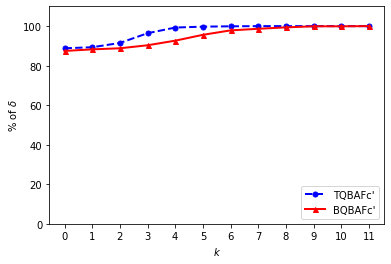

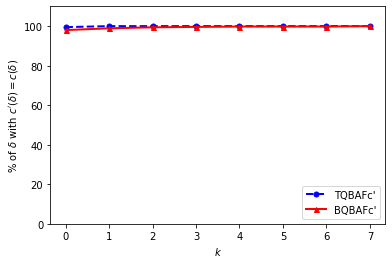

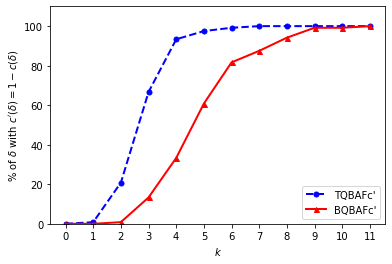

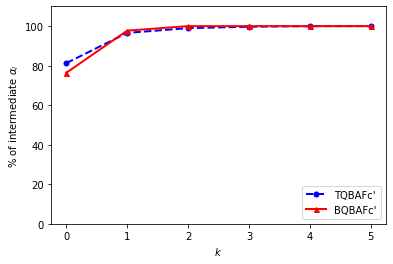

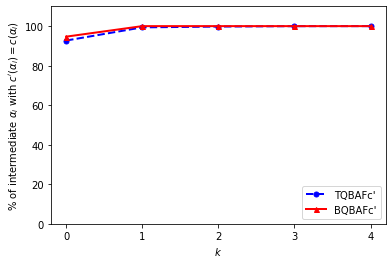

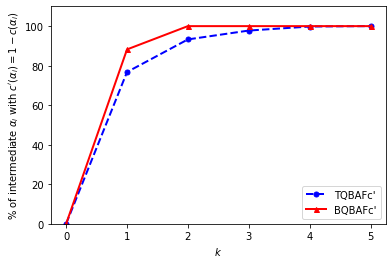

In [70]:
from matplotlib import pyplot as plt
for node_type in ['default', 'non-leaf']:
    for mode in ['all', 'not_flipped', 'flipped']:
        xt, yt = ecdf(get_suff_info(suff_TQBAFcps, node_type, mode))
        xb, yb = ecdf(get_suff_info(suff_BQBAFcps, node_type, mode))
        all_max = max(max(xt), max(xb))
        xt, yt = modified_y(xt, yt, all_max)
        xb, yb = modified_y(xb, yb, all_max)
        plt.figure()
        plt.xticks(range(0, all_max+1))
        plt.ylim(0, 110)
        plt.plot(xt, yt, 'bo--', linewidth=2, markersize=5, label="TQBAFc'")
        plt.plot(xb, yb, 'r^-', linewidth=2, markersize=5, label="BQBAFc'")
        plt.xlabel(r'$k$')
        
        if node_type == 'default':
            title_text = r'% of $\delta$'
            if mode == 'not_flipped':
                title_text += r" with $c'(\delta) = c(\delta)$"
            elif mode == 'flipped':
                title_text += r" with $c'(\delta) = 1 - c(\delta)$"
        else:
            title_text = r'% of intermediate $\alpha_i$'
            if mode == 'not_flipped':
                title_text += r" with $c'(\alpha_i) = c(\alpha_i)$"
            elif mode == 'flipped':
                title_text += r" with $c'(\alpha_i) = 1 - c(\alpha_i)$"
        plt.ylabel(title_text)
        plt.legend(loc='lower right')
        plt.savefig(f'results/1_spam/suffplot_{node_type}_{mode}.png')

### Find the number of arguments that are sufficient for 80% and 100% of all the test examples

In [65]:
for node_type in ['default', 'non-leaf']:
    for mode in ['all', 'not_flipped', 'flipped']:
        xt, yt = ecdf(get_suff_info(suff_TQBAFcps, node_type, mode))
        xb, yb = ecdf(get_suff_info(suff_BQBAFcps, node_type, mode))
        all_max = max(max(xt), max(xb))
        xt, yt = modified_y(xt, yt, all_max)
        xb, yb = modified_y(xb, yb, all_max)
        round2 = lambda x: round(x,2)
        yt = list(map(round2,yt))
        yb = list(map(round2,yb))
        print(node_type.upper(), mode.upper())
        print('TQBAFc\'', list(zip(xt, yt)))
        print('BQBAFc\'', list(zip(xb, yb)))
        print('-'*50)

DEFAULT ALL
TQBAFc' [(0, 88.79), (1, 89.33), (2, 91.48), (3, 96.41), (4, 99.28), (5, 99.73), (6, 99.91), (7, 100.0), (8, 100.0), (9, 100.0), (10, 100.0), (11, 100.0)]
BQBAFc' [(0, 87.44), (1, 88.25), (2, 88.79), (3, 90.31), (4, 92.65), (5, 95.61), (6, 97.85), (7, 98.65), (8, 99.37), (9, 99.91), (10, 99.91), (11, 100.0)]
--------------------------------------------------
DEFAULT NOT_FLIPPED
TQBAFc' [(0, 99.5), (1, 100.0), (2, 100.0), (3, 100.0), (4, 100.0), (5, 100.0), (6, 100.0), (7, 100.0)]
BQBAFc' [(0, 97.99), (1, 98.89), (2, 99.4), (3, 99.6), (4, 99.8), (5, 99.8), (6, 99.8), (7, 100.0)]
--------------------------------------------------
DEFAULT FLIPPED
TQBAFc' [(0, 0), (1, 0.83), (2, 20.83), (3, 66.67), (4, 93.33), (5, 97.5), (6, 99.17), (7, 100.0), (8, 100.0), (9, 100.0), (10, 100.0), (11, 100.0)]
BQBAFc' [(0, 0), (1, 0), (2, 0.83), (3, 13.33), (4, 33.33), (5, 60.83), (6, 81.67), (7, 87.5), (8, 94.17), (9, 99.17), (10, 99.17), (11, 100.0)]
------------------------------------------

# Experiment 2: Plausibility

## Load machine and human (from MTurk) explanations
### Load machine explanations for 500 test samples

In [71]:
cases = pd.read_csv('results/1_spam/machine_explanations.csv')

# See explanation for an example
cases[cases['aidx']==62]

,Unnamed: 0,eidx,aidx,pattern,phrase,TQBAFc_level,TQBAFc_base_score,TQBAFc_class,TQBAFc_strength,TQBAFc'_base_score,TQBAFc'_class,TQBAFc'_strength,BQBAFc_level,BQBAFc_base_score,BQBAFc_class,BQBAFc_strength,BQBAFc'_base_score,BQBAFc'_class,BQBAFc'_strength
15,146,15,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.519964,0.519964,Negative,0.519964,1,0.519964,Negative,0.473646,0.519964,Negative,0.473646
38,170,16,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.519964,0.519964,Negative,0.519964,1,0.519964,Negative,0.478180,0.519964,Negative,0.478180
106,317,31,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.519964,0.519964,Negative,0.519964,1,0.519964,Negative,0.558189,0.519964,Negative,0.558189
115,334,33,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.519964,0.519964,Negative,0.519964,1,0.519964,Negative,0.296466,0.519964,Negative,0.296466
266,585,70,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.136245,0.519964,Negative,0.136245,2,0.519964,Negative,0.464090,0.519964,Negative,0.464090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,10221,1020,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.136245,0.519964,Negative,0.136245,2,0.519964,Negative,0.408215,0.519964,Negative,0.408215
4275,10717,1066,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.136245,0.519964,Negative,0.136245,2,0.519964,Negative,0.431374,0.519964,Negative,0.431374
4317,10852,1081,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",na,2,0.519964,Negative,0.519964,0.519964,Negative,0.519964,1,0.519964,Negative,0.492758,0.519964,Negative,0.492758
4342,10929,1087,62,"[['LEMMA:to', 'SPACY:POS-ADP']]",to,2,0.519964,Negative,0.136245,0.519964,Negative,0.136245,2,0.519964,Negative,0.525990,0.519964,Negative,0.525990


In [72]:
cases_dict = cases.to_dict('records')
cases_dict[0]

{"BQBAFc'_base_score": 1.182645880085895,
 "BQBAFc'_class": 'Positive',
 "BQBAFc'_strength": 1.182645880085895,
 'BQBAFc_base_score': 1.182645880085895,
 'BQBAFc_class': 'Positive',
 'BQBAFc_level': 2,
 'BQBAFc_strength': 1.182645880085895,
 "TQBAFc'_base_score": 1.182645880085895,
 "TQBAFc'_class": 'Positive',
 "TQBAFc'_strength": 1.5056165812987574,
 'TQBAFc_base_score': 1.182645880085895,
 'TQBAFc_class': 'Positive',
 'TQBAFc_level': 1,
 'TQBAFc_strength': 1.5056165812987574,
 'Unnamed: 0': 73,
 'aidx': 1,
 'eidx': 5,
 'pattern': "[['SPACY:POS-NUM']]",
 'phrase': '2'}

### Load human annotations

In [74]:
import json
human_pattern_scores = json.load(open('results/1_spam/MTurk_Patterns.json', 'r'))
human_group_scores = json.load(open('results/1_spam/MTurk_Groups.json', 'r'))
human_phrase_scores = json.load(open('results/1_spam/MTurk_Phrases.json', 'r'))

## Compute Pearson's Correlations

In [75]:
from scipy.stats import pearsonr

### FLX

In [79]:
sign = {'Positive': 1, 'Negative': -1}

machines = []
humans = {'pattern': [], 'group': [], 'phrase': []}
for row in cases_dict: # Using the original base score from all arguments corresponds to FLX.
    machines.append(row['TQBAFc_base_score']*sign[row['TQBAFc_class']]) 
    humans['pattern'].append(human_pattern_scores[str(row['aidx'])]['average'])
    humans['group'].append(human_group_scores[str(row['aidx'])]['average'])
    humans['phrase'].append(human_phrase_scores[row['phrase']]['average'])

print('FLX explanation:')
for k in humans:
    rho = pearsonr(machines, humans[k])[0]
    print(k, rho)

FLX explanation:
pattern 0.22731885251866638
group 0.17519284101673976
phrase -0.02182610582369038


### TQBAFc'

In [81]:
for score, level in [('base_score', 'top'), ('strength', 'top'), ('strength', 'all')]:    
    machines = []
    humans = {'pattern': [], 'group': [], 'phrase': []}
    for row in cases_dict:
        if level == 'all' or (level == 'top' and row['TQBAFc_level'] == 1):
            machines.append(row[f'TQBAFc\'_{score}']*sign[row['TQBAFc\'_class']]) 
            humans['pattern'].append(human_pattern_scores[str(row['aidx'])]['average'])
            humans['group'].append(human_group_scores[str(row['aidx'])]['average'])
            humans['phrase'].append(human_phrase_scores[row['phrase']]['average'])

    print(f'TQBAFc explanation ({score}, {level} level):')
    for k in humans:
        rho = pearsonr(machines, humans[k])[0]
        print(k, rho)
    print('-'*50)

TQBAFc explanation (base_score, top level):
pattern 0.6874424165763271
group 0.5332560336612352
phrase -0.019491650022777765
--------------------------------------------------
TQBAFc explanation (strength, top level):
pattern 0.5204060880199649
group 0.4622629651403332
phrase 0.1251610723158706
--------------------------------------------------
TQBAFc explanation (strength, all level):
pattern 0.17611838227735813
group 0.10021348977246568
phrase 0.0049201193401613025
--------------------------------------------------


### BQBAFc'

In [84]:
for score, level in [('base_score', 'top'), ('strength', 'top'), ('strength', 'all')]:    
    machines = []
    humans = {'pattern': [], 'group': [], 'phrase': []}
    for row in cases_dict:
        if level == 'all' or (level == 'top' and row['BQBAFc_level'] == 1):
            machines.append(row[f'BQBAFc\'_{score}']*sign[row['BQBAFc\'_class']]) 
            humans['pattern'].append(human_pattern_scores[str(row['aidx'])]['average'])
            humans['group'].append(human_group_scores[str(row['aidx'])]['average'])
            humans['phrase'].append(human_phrase_scores[row['phrase']]['average'])

    print(f'BQBAFc explanation ({score}, {level} level):')
    for k in humans:
        rho = pearsonr(machines, humans[k])[0]
        print(k, rho)
    print('-'*50)

BQBAFc explanation (base_score, top level):
pattern 0.19721708190757228
group -0.005163718077411295
phrase -0.046977981961807115
--------------------------------------------------
BQBAFc explanation (strength, top level):
pattern 0.2404127352638727
group 0.1749123284349583
phrase 0.04557137773393836
--------------------------------------------------
BQBAFc explanation (strength, all level):
pattern 0.2712042895743756
group 0.30813260889842253
phrase 0.05325348241506018
--------------------------------------------------


## Calculate Fleiss's Kappa inter-rater agreements

In [85]:
def get_kappa_matrix(the_dict):
    ans = []
    for k, row in the_dict.items():
        ans.append([row['scores'].count(x) for x in [-2, -1, 0, 1, 2]])
    return np.array(ans)

def get_kappa_matrix_three_categories(the_dict):
    ans = []
    for k, row in the_dict.items():
        ans.append([row['scores'].count(-2)+row['scores'].count(-1), row['scores'].count(0), row['scores'].count(1)+row['scores'].count(2)])
    return np.array(ans)

def get_kappa(the_matrix):
    num_raters = the_matrix[0].sum()
    p = the_matrix.sum(axis = 0) / (the_matrix.shape[0] * num_raters)
    P_i = []
    for row in the_matrix:
        P_i.append(((row**2).sum()-num_raters)/(num_raters * (num_raters-1)))
    P_bar = np.mean(P_i)
    P_e = (p**2).sum()
    return (P_bar-P_e)/(1-P_e)

### Five answer categories

In [87]:
print('Pattern:', get_kappa(get_kappa_matrix(human_pattern_scores)))
print('Group:', get_kappa(get_kappa_matrix(human_group_scores)))
print('Phrase:', get_kappa(get_kappa_matrix(human_phrase_scores)))

Pattern: 0.0013880320789635997
Group: 0.06805682618799758
Phrase: 0.1180325605481893


### Three answer categories

In [88]:
print('Pattern:', get_kappa(get_kappa_matrix_three_categories(human_pattern_scores)))
print('Group:', get_kappa(get_kappa_matrix_three_categories(human_group_scores)))
print('Phrase:', get_kappa(get_kappa_matrix_three_categories(human_phrase_scores)))

Pattern: -0.002781211372064228
Group: 0.08450028116470774
Phrase: 0.19177397729495424
